<a href="https://colab.research.google.com/github/ninooo96/ghigliottina-LLM/blob/main/GhigliottinAI_dataset_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Costruzione di un dataset di addestramento per il gioco "La Ghigliottina"

Questo progetto mira a creare un dataset per addestrare modelli di Machine Learning a giocare a "La Ghigliottina".

Raccolta Dati:

- Ricerca Video: Il dataset viene costruito a partire da video di YouTube relativi al gioco "La Ghigliottina" caricati dal canale ufficiale della Rai.
- Estrazione Parole Chiave: Vengono estratte le 5 parole chiave utilizzando tecniche di Optical Character Recognition (OCR) applicate alle anteprime dei video.
- Identificazione della Soluzione: La soluzione viene identificata tramite un modello di Linguaggio di Grandi Dimensioni (LLM), come LLaMa3-8B, che analizza il dialogo estratto dai sottotitoli degli ultimi minuti di ciascun video.

In [ ]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 86.5 MB/s eta 0:00:00


In [ ]:
#import yt_dlp
import pandas as pd
import cv2
import os
from tqdm.notebook import trange, tqdm
import re

In [ ]:
!yt-dlp ytsearchdate500:"La Ghigliottina - L'Eredità" --print-to-file "%(webpage_url)s,'%(title)s',%(uploader)s,%(channel)s" file1.txt --skip-download

[youtube:search:date] Extracting URL: ytsearchdate500:La Ghigliottina - L'Eredità
[download] Downloading playlist: La Ghigliottina - L'Eredità
[youtube:search:date] query "La Ghigliottina - L'Eredità": Downloading web client config
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 1: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 2: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 3: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 4: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 5: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 6: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 7: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 8: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 9: Downlo

Salvo questo log e faccio un altro giro per estrarre le informazioni da quei video che sono andati in errore

In [ ]:
links = []
output_file = 'url_list.txt'
# Leggi il file log
with open('log.txt', 'r') as file:
    lines = file.readlines()

# Itera sulle righe per trovare quella che contiene l'errore
for line in lines:
    if "ERROR: [youtube]" in line:
        # Usa una regex per estrarre il codice del video
        match = re.search(r"ERROR: \[youtube\] (\w+):", line)
        if match:
            video_id = match.group(1)
            links.append(f"https://www.youtube.com/watch?v={video_id}")
            # print(f"https://www.youtube.com/watch?v={video_id}")
with open(output_file, 'w') as file:
    for video_url in links:
        #salvo su un file per scaricare le info tramite yt-dlp
        file.write(video_url + '\n')

In [ ]:
!yt-dlp --skip-download --print "%(webpage_url)s,'%(title)s',%(uploader)s,%(channel)s" -a url_list.txt > file2.txt

In [ ]:
# unisci i 2 file file1.txt (primo giro) e file2.txt (secondo giro di quelli andati in errore)

def unisci_file(file1, file2, output_file):
  """Unisce il contenuto di due file in un unico file.

  Args:
      file1: Il nome del primo file.
      file2: Il nome del secondo file.
      output_file: Il nome del file di output.
  """
  try:
    with open(file1, 'r') as f1, open(file2, 'r') as f2, open(output_file, 'w') as out_f:
      out_f.write(f1.read())
      out_f.write(f2.read())
    print(f"File {file1} e {file2} uniti correttamente in {output_file}.")
  except FileNotFoundError:
    print("Errore: uno o entrambi i file non sono stati trovati.")


# Esempio di utilizzo:
unisci_file('file1.txt', 'file2.txt', 'file.txt')

File file1.txt e file2.txt uniti correttamente in file.txt.


In [ ]:
df = pd.read_csv('file.txt', delimiter=',', names=['url', 'title', 'uploader', 'channel'], on_bad_lines='skip')

# Stampa il DataFrame
df['episode_day'] = df['title'].str.split().str[-1].str.replace("'","")
df

url  \
0    https://www.youtube.com/watch?v=Yq5jddSisew   
1    https://www.youtube.com/watch?v=ktmE00afoCM   
2    https://www.youtube.com/watch?v=kBxDD0Ay3cg   
3    https://www.youtube.com/watch?v=NhXTlWDAXI8   
4    https://www.youtube.com/watch?v=0s-U6TXMkVA   
..                                           ...   
450  https://www.youtube.com/watch?v=gas3BKx51fs   
451  https://www.youtube.com/watch?v=YmtK81T44bA   
452  https://www.youtube.com/watch?v=29Gd4KGEm6w   
453  https://www.youtube.com/watch?v=HlzMy54Bndc   
454  https://www.youtube.com/watch?v=QsQT1RNd0VQ   

                                            title uploader channel episode_day  
0        'La Ghigliottina - L'Eredità 19/11/2024'      Rai     Rai  19/11/2024  
1        'La Ghigliottina - L'Eredità 18/11/2024'      Rai     Rai  18/11/2024  
2        'La Ghigliottina - L'Eredità 17/11/2024'      Rai     Rai  17/11/2024  
3        'La Ghigliottina - L'Eredità 16/11/2024'      Rai     Rai  16/11/2024  
4        'La Ghigliottina - L'Eredità 15/11/2024'      Rai     Rai  15/11/2024  
..                                            ...      ...     ...         ...  
450  'La ghigliottina - L'Eredità del 16/04/2019'      Rai     Rai  16/04/2019  
451  'La ghigliottina - L'Eredità del 15/04/2019'      Rai     Rai  15/04/2019  
452  'La ghigliottina - L'Eredità del 11/04/2019'      Rai     Rai  11/04/2019  
453  'La ghigliottina - L'Eredità del 10/04/2019'      Rai     Rai  10/04/2019  
454  'La ghigliottina - L'Eredità del 27/03/2019'      Rai     Rai  27/03/2019  

[455 rows x 5 columns]

Da questo primo dataset partiamo per estrarre i frame contenenti le 5 parole e i sottotitoli al video

In [ ]:
!mkdir frames
!mkdir subtitles

In [ ]:
#Io l'ho fatto con il comando bash ma si sarebbe potuto implementare anche così
'''
# Definisci la query di ricerca
search_query = "La Ghigliottina - L'Eredità"
search_url = f"ytsearchdate500:{search_query}"

# Configura yt-dlp per ottenere solo le informazioni dei video
ydl_opts = {
    'quiet': False,
    #'default_search': 'ytsearch5',  # Limita a 5 risultati della ricerca
    'ignoreerrors': 'only_download',
    'skip_download': True,
    'force_generic_extractor': True,
    'geo-bypass':True,
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    # Esegui la ricerca e ottieni i risultati
    result = ydl.extract_info(search_url, download=False)

# Estrai i link dei video dai risultati
# video_links = [entry['webpage_url'] for entry in result['entries']]

# Stampa i link dei video
# print(video_links)
'''

[youtube:search:date] Extracting URL: ytsearchdate500:La Ghigliottina - L'Eredità
[download] Downloading playlist: La Ghigliottina - L'Eredità
[youtube:search:date] query "La Ghigliottina - L'Eredità": Downloading web client config
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 1: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 2: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 3: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 4: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 5: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 6: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 7: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 8: Downloading API JSON
[youtube:search:date] query "La Ghigliottina - L'Eredità" page 9: Downlo

ERROR: [youtube] Lt-zkBe3GRk: Video unavailable. This content isn't available, try again later.


[download] Downloading item 334 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=xK60OWX4u2A
[youtube] xK60OWX4u2A: Downloading webpage
[youtube] xK60OWX4u2A: Downloading ios player API JSON
[youtube] xK60OWX4u2A: Downloading mweb player API JSON
[youtube] xK60OWX4u2A: Downloading m3u8 information
[download] Downloading item 335 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=Z8zi8LywO2g
[youtube] Z8zi8LywO2g: Downloading webpage
[youtube] Z8zi8LywO2g: Downloading ios player API JSON
[youtube] Z8zi8LywO2g: Downloading mweb player API JSON
[youtube] Z8zi8LywO2g: Downloading m3u8 information
[download] Downloading item 336 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=7j0UMeFrdEo
[youtube] 7j0UMeFrdEo: Downloading webpage
[youtube] 7j0UMeFrdEo: Downloading ios player API JSON
[youtube] 7j0UMeFrdEo: Downloading mweb player API JSON


ERROR: [youtube] 7j0UMeFrdEo: Video unavailable. This content isn't available, try again later.


[download] Downloading item 337 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=nhY9N2drDiQ
[youtube] nhY9N2drDiQ: Downloading webpage
[youtube] nhY9N2drDiQ: Downloading ios player API JSON
[youtube] nhY9N2drDiQ: Downloading mweb player API JSON


ERROR: [youtube] nhY9N2drDiQ: Video unavailable. This content isn't available, try again later.


[download] Downloading item 338 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=nqFKeDP32gA
[youtube] nqFKeDP32gA: Downloading webpage
[youtube] nqFKeDP32gA: Downloading ios player API JSON
[youtube] nqFKeDP32gA: Downloading mweb player API JSON


ERROR: [youtube] nqFKeDP32gA: Video unavailable. This content isn't available, try again later.


[download] Downloading item 339 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=vwCteWByg-M
[youtube] vwCteWByg-M: Downloading webpage
[youtube] vwCteWByg-M: Downloading ios player API JSON
[youtube] vwCteWByg-M: Downloading mweb player API JSON


ERROR: [youtube] vwCteWByg-M: Video unavailable. This content isn't available, try again later.


[download] Downloading item 340 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=hB2ByLPOA3w
[youtube] hB2ByLPOA3w: Downloading webpage
[youtube] hB2ByLPOA3w: Downloading ios player API JSON
[youtube] hB2ByLPOA3w: Downloading mweb player API JSON


ERROR: [youtube] hB2ByLPOA3w: Video unavailable. This content isn't available, try again later.


[download] Downloading item 341 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=sBoHMcoBhdQ
[youtube] sBoHMcoBhdQ: Downloading webpage
[youtube] sBoHMcoBhdQ: Downloading ios player API JSON
[youtube] sBoHMcoBhdQ: Downloading mweb player API JSON


ERROR: [youtube] sBoHMcoBhdQ: Video unavailable. This content isn't available, try again later.


[download] Downloading item 342 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=qxbQ9p6y3b8
[youtube] qxbQ9p6y3b8: Downloading webpage
[youtube] qxbQ9p6y3b8: Downloading ios player API JSON
[youtube] qxbQ9p6y3b8: Downloading mweb player API JSON


ERROR: [youtube] qxbQ9p6y3b8: Video unavailable. This content isn't available, try again later.


[download] Downloading item 343 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=WJmgkEiwohQ
[youtube] WJmgkEiwohQ: Downloading webpage
[youtube] WJmgkEiwohQ: Downloading ios player API JSON
[youtube] WJmgkEiwohQ: Downloading mweb player API JSON


ERROR: [youtube] WJmgkEiwohQ: Video unavailable. This content isn't available, try again later.


[download] Downloading item 344 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=4_TCaw6Emfg
[youtube] 4_TCaw6Emfg: Downloading webpage
[youtube] 4_TCaw6Emfg: Downloading ios player API JSON
[youtube] 4_TCaw6Emfg: Downloading mweb player API JSON


ERROR: [youtube] 4_TCaw6Emfg: Video unavailable. This content isn't available, try again later.


[download] Downloading item 345 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=DYn-i_Ji7qo
[youtube] DYn-i_Ji7qo: Downloading webpage
[youtube] DYn-i_Ji7qo: Downloading ios player API JSON
[youtube] DYn-i_Ji7qo: Downloading mweb player API JSON


ERROR: [youtube] DYn-i_Ji7qo: Video unavailable. This content isn't available, try again later.


[download] Downloading item 346 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=qKCLt_bQr4A
[youtube] qKCLt_bQr4A: Downloading webpage
[youtube] qKCLt_bQr4A: Downloading ios player API JSON
[youtube] qKCLt_bQr4A: Downloading mweb player API JSON


ERROR: [youtube] qKCLt_bQr4A: Video unavailable. This content isn't available, try again later.


[download] Downloading item 347 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=dmM0co9WMXE
[youtube] dmM0co9WMXE: Downloading webpage
[youtube] dmM0co9WMXE: Downloading ios player API JSON
[youtube] dmM0co9WMXE: Downloading mweb player API JSON


ERROR: [youtube] dmM0co9WMXE: Video unavailable. This content isn't available, try again later.


[download] Downloading item 348 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=9nG9_cURe_c
[youtube] 9nG9_cURe_c: Downloading webpage
[youtube] 9nG9_cURe_c: Downloading ios player API JSON
[youtube] 9nG9_cURe_c: Downloading mweb player API JSON


ERROR: [youtube] 9nG9_cURe_c: Video unavailable. This content isn't available, try again later.


[download] Downloading item 349 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=buvBHj8DSqE
[youtube] buvBHj8DSqE: Downloading webpage
[youtube] buvBHj8DSqE: Downloading ios player API JSON
[youtube] buvBHj8DSqE: Downloading mweb player API JSON


ERROR: [youtube] buvBHj8DSqE: Video unavailable. This content isn't available, try again later.


[download] Downloading item 350 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=jM-8qby9eKI
[youtube] jM-8qby9eKI: Downloading webpage
[youtube] jM-8qby9eKI: Downloading ios player API JSON
[youtube] jM-8qby9eKI: Downloading mweb player API JSON


ERROR: [youtube] jM-8qby9eKI: Video unavailable. This content isn't available, try again later.


[download] Downloading item 351 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=yBVJUY5-HHI
[youtube] yBVJUY5-HHI: Downloading webpage
[youtube] yBVJUY5-HHI: Downloading ios player API JSON
[youtube] yBVJUY5-HHI: Downloading mweb player API JSON


ERROR: [youtube] yBVJUY5-HHI: Video unavailable. This content isn't available, try again later.


[download] Downloading item 352 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=No430S68MHY
[youtube] No430S68MHY: Downloading webpage
[youtube] No430S68MHY: Downloading ios player API JSON
[youtube] No430S68MHY: Downloading mweb player API JSON


ERROR: [youtube] No430S68MHY: Video unavailable. This content isn't available, try again later.


[download] Downloading item 353 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=JNwN8LBBM8g
[youtube] JNwN8LBBM8g: Downloading webpage
[youtube] JNwN8LBBM8g: Downloading ios player API JSON
[youtube] JNwN8LBBM8g: Downloading mweb player API JSON


ERROR: [youtube] JNwN8LBBM8g: Video unavailable. This content isn't available, try again later.


[download] Downloading item 354 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=pAdO68MzSZs
[youtube] pAdO68MzSZs: Downloading webpage
[youtube] pAdO68MzSZs: Downloading ios player API JSON
[youtube] pAdO68MzSZs: Downloading mweb player API JSON


ERROR: [youtube] pAdO68MzSZs: Video unavailable. This content isn't available, try again later.


[download] Downloading item 355 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=hTQeFLUGbHk
[youtube] hTQeFLUGbHk: Downloading webpage
[youtube] hTQeFLUGbHk: Downloading ios player API JSON
[youtube] hTQeFLUGbHk: Downloading mweb player API JSON


ERROR: [youtube] hTQeFLUGbHk: Video unavailable. This content isn't available, try again later.


[download] Downloading item 356 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=yb0xosAqprA
[youtube] yb0xosAqprA: Downloading webpage
[youtube] yb0xosAqprA: Downloading ios player API JSON
[youtube] yb0xosAqprA: Downloading mweb player API JSON


ERROR: [youtube] yb0xosAqprA: Video unavailable. This content isn't available, try again later.


[download] Downloading item 357 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=jFe1wqXFoDI
[youtube] jFe1wqXFoDI: Downloading webpage
[youtube] jFe1wqXFoDI: Downloading ios player API JSON
[youtube] jFe1wqXFoDI: Downloading mweb player API JSON


ERROR: [youtube] jFe1wqXFoDI: Video unavailable. This content isn't available, try again later.


[download] Downloading item 358 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=SqUxalZZpxc
[youtube] SqUxalZZpxc: Downloading webpage
[youtube] SqUxalZZpxc: Downloading ios player API JSON
[youtube] SqUxalZZpxc: Downloading mweb player API JSON


ERROR: [youtube] SqUxalZZpxc: Video unavailable. This content isn't available, try again later.


[download] Downloading item 359 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=0X7o1q1tt4A
[youtube] 0X7o1q1tt4A: Downloading webpage
[youtube] 0X7o1q1tt4A: Downloading ios player API JSON
[youtube] 0X7o1q1tt4A: Downloading mweb player API JSON


ERROR: [youtube] 0X7o1q1tt4A: Video unavailable. This content isn't available, try again later.


[download] Downloading item 360 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=2jyZogois_c
[youtube] 2jyZogois_c: Downloading webpage
[youtube] 2jyZogois_c: Downloading ios player API JSON
[youtube] 2jyZogois_c: Downloading mweb player API JSON


ERROR: [youtube] 2jyZogois_c: Video unavailable. This content isn't available, try again later.


[download] Downloading item 361 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=SAQVs8vulsQ
[youtube] SAQVs8vulsQ: Downloading webpage
[youtube] SAQVs8vulsQ: Downloading ios player API JSON
[youtube] SAQVs8vulsQ: Downloading mweb player API JSON


ERROR: [youtube] SAQVs8vulsQ: Video unavailable. This content isn't available, try again later.


[download] Downloading item 362 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=upkZWL-Zu18
[youtube] upkZWL-Zu18: Downloading webpage
[youtube] upkZWL-Zu18: Downloading ios player API JSON
[youtube] upkZWL-Zu18: Downloading mweb player API JSON


ERROR: [youtube] upkZWL-Zu18: Video unavailable. This content isn't available, try again later.


[download] Downloading item 363 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=w_i7TTazfCM
[youtube] w_i7TTazfCM: Downloading webpage
[youtube] w_i7TTazfCM: Downloading ios player API JSON
[youtube] w_i7TTazfCM: Downloading mweb player API JSON


ERROR: [youtube] w_i7TTazfCM: Video unavailable. This content isn't available, try again later.


[download] Downloading item 364 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=jUeJfhq9nPU
[youtube] jUeJfhq9nPU: Downloading webpage
[youtube] jUeJfhq9nPU: Downloading ios player API JSON
[youtube] jUeJfhq9nPU: Downloading mweb player API JSON


ERROR: [youtube] jUeJfhq9nPU: Video unavailable. This content isn't available, try again later.


[download] Downloading item 365 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=tMXVp_68Wmo
[youtube] tMXVp_68Wmo: Downloading webpage
[youtube] tMXVp_68Wmo: Downloading ios player API JSON
[youtube] tMXVp_68Wmo: Downloading mweb player API JSON


ERROR: [youtube] tMXVp_68Wmo: Video unavailable. This content isn't available, try again later.


[download] Downloading item 366 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=wCG-om-ix4Q
[youtube] wCG-om-ix4Q: Downloading webpage
[youtube] wCG-om-ix4Q: Downloading ios player API JSON
[youtube] wCG-om-ix4Q: Downloading mweb player API JSON


ERROR: [youtube] wCG-om-ix4Q: Video unavailable. This content isn't available, try again later.


[download] Downloading item 367 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=JjefaBR9hss
[youtube] JjefaBR9hss: Downloading webpage
[youtube] JjefaBR9hss: Downloading ios player API JSON
[youtube] JjefaBR9hss: Downloading mweb player API JSON


ERROR: [youtube] JjefaBR9hss: Video unavailable. This content isn't available, try again later.


[download] Downloading item 368 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=39E4ay8F1Ag
[youtube] 39E4ay8F1Ag: Downloading webpage
[youtube] 39E4ay8F1Ag: Downloading ios player API JSON
[youtube] 39E4ay8F1Ag: Downloading mweb player API JSON


ERROR: [youtube] 39E4ay8F1Ag: Video unavailable. This content isn't available, try again later.


[download] Downloading item 369 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=iS1nltIzmDQ
[youtube] iS1nltIzmDQ: Downloading webpage
[youtube] iS1nltIzmDQ: Downloading ios player API JSON
[youtube] iS1nltIzmDQ: Downloading mweb player API JSON


ERROR: [youtube] iS1nltIzmDQ: Video unavailable. This content isn't available, try again later.


[download] Downloading item 370 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=QP_Pa07Tzp8
[youtube] QP_Pa07Tzp8: Downloading webpage
[youtube] QP_Pa07Tzp8: Downloading ios player API JSON
[youtube] QP_Pa07Tzp8: Downloading mweb player API JSON


ERROR: [youtube] QP_Pa07Tzp8: Video unavailable. This content isn't available, try again later.


[download] Downloading item 371 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=YRSaAvYjl24
[youtube] YRSaAvYjl24: Downloading webpage
[youtube] YRSaAvYjl24: Downloading ios player API JSON
[youtube] YRSaAvYjl24: Downloading mweb player API JSON


ERROR: [youtube] YRSaAvYjl24: Video unavailable. This content isn't available, try again later.


[download] Downloading item 372 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=CN2jtT8lzvQ
[youtube] CN2jtT8lzvQ: Downloading webpage
[youtube] CN2jtT8lzvQ: Downloading ios player API JSON
[youtube] CN2jtT8lzvQ: Downloading mweb player API JSON


ERROR: [youtube] CN2jtT8lzvQ: Video unavailable. This content isn't available, try again later.


[download] Downloading item 373 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=NvVMgePp3SA
[youtube] NvVMgePp3SA: Downloading webpage
[youtube] NvVMgePp3SA: Downloading ios player API JSON
[youtube] NvVMgePp3SA: Downloading mweb player API JSON


ERROR: [youtube] NvVMgePp3SA: Video unavailable. This content isn't available, try again later.


[download] Downloading item 374 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=iSBerDAzjhc
[youtube] iSBerDAzjhc: Downloading webpage
[youtube] iSBerDAzjhc: Downloading ios player API JSON
[youtube] iSBerDAzjhc: Downloading mweb player API JSON


ERROR: [youtube] iSBerDAzjhc: Video unavailable. This content isn't available, try again later.


[download] Downloading item 375 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=Z1EUbQ7aE8o
[youtube] Z1EUbQ7aE8o: Downloading webpage
[youtube] Z1EUbQ7aE8o: Downloading ios player API JSON
[youtube] Z1EUbQ7aE8o: Downloading mweb player API JSON


ERROR: [youtube] Z1EUbQ7aE8o: Video unavailable. This content isn't available, try again later.


[download] Downloading item 376 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=evYjntla40I
[youtube] evYjntla40I: Downloading webpage
[youtube] evYjntla40I: Downloading ios player API JSON
[youtube] evYjntla40I: Downloading mweb player API JSON


ERROR: [youtube] evYjntla40I: Video unavailable. This content isn't available, try again later.


[download] Downloading item 377 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=rTfcXWwUsJc
[youtube] rTfcXWwUsJc: Downloading webpage
[youtube] rTfcXWwUsJc: Downloading ios player API JSON
[youtube] rTfcXWwUsJc: Downloading mweb player API JSON


ERROR: [youtube] rTfcXWwUsJc: Video unavailable. This content isn't available, try again later.


[download] Downloading item 378 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=cUd-tKy5mhE
[youtube] cUd-tKy5mhE: Downloading webpage
[youtube] cUd-tKy5mhE: Downloading ios player API JSON
[youtube] cUd-tKy5mhE: Downloading mweb player API JSON


ERROR: [youtube] cUd-tKy5mhE: Video unavailable. This content isn't available, try again later.


[download] Downloading item 379 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=fl5fK0L6xyA
[youtube] fl5fK0L6xyA: Downloading webpage
[youtube] fl5fK0L6xyA: Downloading ios player API JSON
[youtube] fl5fK0L6xyA: Downloading mweb player API JSON


ERROR: [youtube] fl5fK0L6xyA: Video unavailable. This content isn't available, try again later.


[download] Downloading item 380 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=SgX5D7549gs
[youtube] SgX5D7549gs: Downloading webpage
[youtube] SgX5D7549gs: Downloading ios player API JSON
[youtube] SgX5D7549gs: Downloading mweb player API JSON


ERROR: [youtube] SgX5D7549gs: Video unavailable. This content isn't available, try again later.


[download] Downloading item 381 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=eMjl7Qky0FI
[youtube] eMjl7Qky0FI: Downloading webpage
[youtube] eMjl7Qky0FI: Downloading ios player API JSON
[youtube] eMjl7Qky0FI: Downloading mweb player API JSON


ERROR: [youtube] eMjl7Qky0FI: Video unavailable. This content isn't available, try again later.


[download] Downloading item 382 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=JU1qO20Q4Tc
[youtube] JU1qO20Q4Tc: Downloading webpage
[youtube] JU1qO20Q4Tc: Downloading ios player API JSON
[youtube] JU1qO20Q4Tc: Downloading mweb player API JSON


ERROR: [youtube] JU1qO20Q4Tc: Video unavailable. This content isn't available, try again later.


[download] Downloading item 383 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=rjDV1uPkvVI
[youtube] rjDV1uPkvVI: Downloading webpage
[youtube] rjDV1uPkvVI: Downloading ios player API JSON
[youtube] rjDV1uPkvVI: Downloading mweb player API JSON


ERROR: [youtube] rjDV1uPkvVI: Video unavailable. This content isn't available, try again later.


[download] Downloading item 384 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=VdUP-NPqCgM
[youtube] VdUP-NPqCgM: Downloading webpage
[youtube] VdUP-NPqCgM: Downloading ios player API JSON
[youtube] VdUP-NPqCgM: Downloading mweb player API JSON


ERROR: [youtube] VdUP-NPqCgM: Video unavailable. This content isn't available, try again later.


[download] Downloading item 385 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=Da4kRSIRkAw
[youtube] Da4kRSIRkAw: Downloading webpage
[youtube] Da4kRSIRkAw: Downloading ios player API JSON
[youtube] Da4kRSIRkAw: Downloading mweb player API JSON


ERROR: [youtube] Da4kRSIRkAw: Video unavailable. This content isn't available, try again later.


[download] Downloading item 386 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=ZsfTt-ppEr0
[youtube] ZsfTt-ppEr0: Downloading webpage
[youtube] ZsfTt-ppEr0: Downloading ios player API JSON
[youtube] ZsfTt-ppEr0: Downloading mweb player API JSON


ERROR: [youtube] ZsfTt-ppEr0: Video unavailable. This content isn't available, try again later.


[download] Downloading item 387 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=NFiVOntsey0
[youtube] NFiVOntsey0: Downloading webpage
[youtube] NFiVOntsey0: Downloading ios player API JSON
[youtube] NFiVOntsey0: Downloading mweb player API JSON


ERROR: [youtube] NFiVOntsey0: Video unavailable. This content isn't available, try again later.


[download] Downloading item 388 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=PRNWokA9ecU
[youtube] PRNWokA9ecU: Downloading webpage
[youtube] PRNWokA9ecU: Downloading ios player API JSON
[youtube] PRNWokA9ecU: Downloading mweb player API JSON


ERROR: [youtube] PRNWokA9ecU: Video unavailable. This content isn't available, try again later.


[download] Downloading item 389 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=A7Ux5SxO_bA
[youtube] A7Ux5SxO_bA: Downloading webpage
[youtube] A7Ux5SxO_bA: Downloading ios player API JSON
[youtube] A7Ux5SxO_bA: Downloading mweb player API JSON


ERROR: [youtube] A7Ux5SxO_bA: Video unavailable. This content isn't available, try again later.


[download] Downloading item 390 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=A_xROwyN62g
[youtube] A_xROwyN62g: Downloading webpage
[youtube] A_xROwyN62g: Downloading ios player API JSON
[youtube] A_xROwyN62g: Downloading mweb player API JSON


ERROR: [youtube] A_xROwyN62g: Video unavailable. This content isn't available, try again later.


[download] Downloading item 391 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=ScleUgz9cpo
[youtube] ScleUgz9cpo: Downloading webpage
[youtube] ScleUgz9cpo: Downloading ios player API JSON
[youtube] ScleUgz9cpo: Downloading mweb player API JSON


ERROR: [youtube] ScleUgz9cpo: Video unavailable. This content isn't available, try again later.


[download] Downloading item 392 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=30Sbv-v62t8
[youtube] 30Sbv-v62t8: Downloading webpage
[youtube] 30Sbv-v62t8: Downloading ios player API JSON
[youtube] 30Sbv-v62t8: Downloading mweb player API JSON


ERROR: [youtube] 30Sbv-v62t8: Video unavailable. This content isn't available, try again later.


[download] Downloading item 393 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=iu8OWovfbc0
[youtube] iu8OWovfbc0: Downloading webpage
[youtube] iu8OWovfbc0: Downloading ios player API JSON
[youtube] iu8OWovfbc0: Downloading mweb player API JSON


ERROR: [youtube] iu8OWovfbc0: Video unavailable. This content isn't available, try again later.


[download] Downloading item 394 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=gpM773vxdeM
[youtube] gpM773vxdeM: Downloading webpage
[youtube] gpM773vxdeM: Downloading ios player API JSON
[youtube] gpM773vxdeM: Downloading mweb player API JSON


ERROR: [youtube] gpM773vxdeM: Video unavailable. This content isn't available, try again later.


[download] Downloading item 395 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=A5mvARVzcPc
[youtube] A5mvARVzcPc: Downloading webpage
[youtube] A5mvARVzcPc: Downloading ios player API JSON
[youtube] A5mvARVzcPc: Downloading mweb player API JSON


ERROR: [youtube] A5mvARVzcPc: Video unavailable. This content isn't available, try again later.


[download] Downloading item 396 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=FnVbR-oMnXs
[youtube] FnVbR-oMnXs: Downloading webpage
[youtube] FnVbR-oMnXs: Downloading ios player API JSON
[youtube] FnVbR-oMnXs: Downloading mweb player API JSON


ERROR: [youtube] FnVbR-oMnXs: Video unavailable. This content isn't available, try again later.


[download] Downloading item 397 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=49Ykjvk4Jew
[youtube] 49Ykjvk4Jew: Downloading webpage
[youtube] 49Ykjvk4Jew: Downloading ios player API JSON
[youtube] 49Ykjvk4Jew: Downloading mweb player API JSON


ERROR: [youtube] 49Ykjvk4Jew: Video unavailable. This content isn't available, try again later.


[download] Downloading item 398 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=cte9Z2opLwM
[youtube] cte9Z2opLwM: Downloading webpage
[youtube] cte9Z2opLwM: Downloading ios player API JSON
[youtube] cte9Z2opLwM: Downloading mweb player API JSON


ERROR: [youtube] cte9Z2opLwM: Video unavailable. This content isn't available, try again later.


[download] Downloading item 399 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=pj1L_UhUCvo
[youtube] pj1L_UhUCvo: Downloading webpage
[youtube] pj1L_UhUCvo: Downloading ios player API JSON
[youtube] pj1L_UhUCvo: Downloading mweb player API JSON


ERROR: [youtube] pj1L_UhUCvo: Video unavailable. This content isn't available, try again later.


[download] Downloading item 400 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=OeC8R9lCPRg
[youtube] OeC8R9lCPRg: Downloading webpage
[youtube] OeC8R9lCPRg: Downloading ios player API JSON
[youtube] OeC8R9lCPRg: Downloading mweb player API JSON


ERROR: [youtube] OeC8R9lCPRg: Video unavailable. This content isn't available, try again later.


[download] Downloading item 401 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=CzR_Zdi25Qk
[youtube] CzR_Zdi25Qk: Downloading webpage
[youtube] CzR_Zdi25Qk: Downloading ios player API JSON
[youtube] CzR_Zdi25Qk: Downloading mweb player API JSON


ERROR: [youtube] CzR_Zdi25Qk: Video unavailable. This content isn't available, try again later.


[download] Downloading item 402 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=ZVIkf9KpN94
[youtube] ZVIkf9KpN94: Downloading webpage
[youtube] ZVIkf9KpN94: Downloading ios player API JSON
[youtube] ZVIkf9KpN94: Downloading mweb player API JSON


ERROR: [youtube] ZVIkf9KpN94: Video unavailable. This content isn't available, try again later.


[download] Downloading item 403 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=Xft7xqtgntk
[youtube] Xft7xqtgntk: Downloading webpage
[youtube] Xft7xqtgntk: Downloading ios player API JSON
[youtube] Xft7xqtgntk: Downloading mweb player API JSON


ERROR: [youtube] Xft7xqtgntk: Video unavailable. This content isn't available, try again later.


[download] Downloading item 404 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=aSUP7lfrjwg
[youtube] aSUP7lfrjwg: Downloading webpage
[youtube] aSUP7lfrjwg: Downloading ios player API JSON
[youtube] aSUP7lfrjwg: Downloading mweb player API JSON


ERROR: [youtube] aSUP7lfrjwg: Video unavailable. This content isn't available, try again later.


[download] Downloading item 405 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=WZKxcOxsZNw
[youtube] WZKxcOxsZNw: Downloading webpage
[youtube] WZKxcOxsZNw: Downloading ios player API JSON
[youtube] WZKxcOxsZNw: Downloading mweb player API JSON


ERROR: [youtube] WZKxcOxsZNw: Video unavailable. This content isn't available, try again later.


[download] Downloading item 406 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=5cnEqRQnUe0
[youtube] 5cnEqRQnUe0: Downloading webpage
[youtube] 5cnEqRQnUe0: Downloading ios player API JSON
[youtube] 5cnEqRQnUe0: Downloading mweb player API JSON


ERROR: [youtube] 5cnEqRQnUe0: Video unavailable. This content isn't available, try again later.


[download] Downloading item 407 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=_r0P_Axd7Lc
[youtube] _r0P_Axd7Lc: Downloading webpage
[youtube] _r0P_Axd7Lc: Downloading ios player API JSON
[youtube] _r0P_Axd7Lc: Downloading mweb player API JSON


ERROR: [youtube] _r0P_Axd7Lc: Video unavailable. This content isn't available, try again later.


[download] Downloading item 408 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=zLjouWYVzCA
[youtube] zLjouWYVzCA: Downloading webpage
[youtube] zLjouWYVzCA: Downloading ios player API JSON
[youtube] zLjouWYVzCA: Downloading mweb player API JSON


ERROR: [youtube] zLjouWYVzCA: Video unavailable. This content isn't available, try again later.


[download] Downloading item 409 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=gYzMfFN1uEI
[youtube] gYzMfFN1uEI: Downloading webpage
[youtube] gYzMfFN1uEI: Downloading ios player API JSON
[youtube] gYzMfFN1uEI: Downloading mweb player API JSON


ERROR: [youtube] gYzMfFN1uEI: Video unavailable. This content isn't available, try again later.


[download] Downloading item 410 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=uxdzexk4BuU
[youtube] uxdzexk4BuU: Downloading webpage
[youtube] uxdzexk4BuU: Downloading ios player API JSON
[youtube] uxdzexk4BuU: Downloading mweb player API JSON


ERROR: [youtube] uxdzexk4BuU: Video unavailable. This content isn't available, try again later.


[download] Downloading item 411 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=Thl_ms0CyQs
[youtube] Thl_ms0CyQs: Downloading webpage
[youtube] Thl_ms0CyQs: Downloading ios player API JSON
[youtube] Thl_ms0CyQs: Downloading mweb player API JSON


ERROR: [youtube] Thl_ms0CyQs: Video unavailable. This content isn't available, try again later.


[download] Downloading item 412 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=cRqGjXW2A7c
[youtube] cRqGjXW2A7c: Downloading webpage
[youtube] cRqGjXW2A7c: Downloading ios player API JSON
[youtube] cRqGjXW2A7c: Downloading mweb player API JSON


ERROR: [youtube] cRqGjXW2A7c: Video unavailable. This content isn't available, try again later.


[download] Downloading item 413 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=rPTn4YGy3FI
[youtube] rPTn4YGy3FI: Downloading webpage
[youtube] rPTn4YGy3FI: Downloading ios player API JSON
[youtube] rPTn4YGy3FI: Downloading mweb player API JSON


ERROR: [youtube] rPTn4YGy3FI: Video unavailable. This content isn't available, try again later.


[download] Downloading item 414 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=SUehrxETAjA
[youtube] SUehrxETAjA: Downloading webpage
[youtube] SUehrxETAjA: Downloading ios player API JSON
[youtube] SUehrxETAjA: Downloading mweb player API JSON


ERROR: [youtube] SUehrxETAjA: Video unavailable. This content isn't available, try again later.


[download] Downloading item 415 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=c86ri9bXG8k
[youtube] c86ri9bXG8k: Downloading webpage
[youtube] c86ri9bXG8k: Downloading ios player API JSON
[youtube] c86ri9bXG8k: Downloading mweb player API JSON


ERROR: [youtube] c86ri9bXG8k: Video unavailable. This content isn't available, try again later.


[download] Downloading item 416 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=gOQVFcsNRSE
[youtube] gOQVFcsNRSE: Downloading webpage
[youtube] gOQVFcsNRSE: Downloading ios player API JSON
[youtube] gOQVFcsNRSE: Downloading mweb player API JSON


ERROR: [youtube] gOQVFcsNRSE: Video unavailable. This content isn't available, try again later.


[download] Downloading item 417 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=QAqjNwZWPAE
[youtube] QAqjNwZWPAE: Downloading webpage
[youtube] QAqjNwZWPAE: Downloading ios player API JSON
[youtube] QAqjNwZWPAE: Downloading mweb player API JSON


ERROR: [youtube] QAqjNwZWPAE: Video unavailable. This content isn't available, try again later.


[download] Downloading item 418 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=Qrj2XbmacKI
[youtube] Qrj2XbmacKI: Downloading webpage
[youtube] Qrj2XbmacKI: Downloading ios player API JSON
[youtube] Qrj2XbmacKI: Downloading mweb player API JSON


ERROR: [youtube] Qrj2XbmacKI: Video unavailable. This content isn't available, try again later.


[download] Downloading item 419 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=1eSpNJdpxOw
[youtube] 1eSpNJdpxOw: Downloading webpage
[youtube] 1eSpNJdpxOw: Downloading ios player API JSON
[youtube] 1eSpNJdpxOw: Downloading mweb player API JSON


ERROR: [youtube] 1eSpNJdpxOw: Video unavailable. This content isn't available, try again later.


[download] Downloading item 420 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=lnySwHXz3-A
[youtube] lnySwHXz3-A: Downloading webpage
[youtube] lnySwHXz3-A: Downloading ios player API JSON
[youtube] lnySwHXz3-A: Downloading mweb player API JSON


ERROR: [youtube] lnySwHXz3-A: Video unavailable. This content isn't available, try again later.


[download] Downloading item 421 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=0l910S5sNrU
[youtube] 0l910S5sNrU: Downloading webpage
[youtube] 0l910S5sNrU: Downloading ios player API JSON
[youtube] 0l910S5sNrU: Downloading mweb player API JSON


ERROR: [youtube] 0l910S5sNrU: Video unavailable. This content isn't available, try again later.


[download] Downloading item 422 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=FDKPGDcf2IU
[youtube] FDKPGDcf2IU: Downloading webpage
[youtube] FDKPGDcf2IU: Downloading ios player API JSON
[youtube] FDKPGDcf2IU: Downloading mweb player API JSON


ERROR: [youtube] FDKPGDcf2IU: Video unavailable. This content isn't available, try again later.


[download] Downloading item 423 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=gnaKLy6jNQM
[youtube] gnaKLy6jNQM: Downloading webpage
[youtube] gnaKLy6jNQM: Downloading ios player API JSON
[youtube] gnaKLy6jNQM: Downloading mweb player API JSON


ERROR: [youtube] gnaKLy6jNQM: Video unavailable. This content isn't available, try again later.


[download] Downloading item 424 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=vd10EDVlahs
[youtube] vd10EDVlahs: Downloading webpage
[youtube] vd10EDVlahs: Downloading ios player API JSON
[youtube] vd10EDVlahs: Downloading mweb player API JSON


ERROR: [youtube] vd10EDVlahs: Video unavailable. This content isn't available, try again later.


[download] Downloading item 425 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=WNGYbrYJu-M
[youtube] WNGYbrYJu-M: Downloading webpage
[youtube] WNGYbrYJu-M: Downloading ios player API JSON
[youtube] WNGYbrYJu-M: Downloading mweb player API JSON


ERROR: [youtube] WNGYbrYJu-M: Video unavailable. This content isn't available, try again later.


[download] Downloading item 426 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=GXfqLFgRCVo
[youtube] GXfqLFgRCVo: Downloading webpage
[youtube] GXfqLFgRCVo: Downloading ios player API JSON
[youtube] GXfqLFgRCVo: Downloading mweb player API JSON


ERROR: [youtube] GXfqLFgRCVo: Video unavailable. This content isn't available, try again later.


[download] Downloading item 427 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=QR-weEXprfw
[youtube] QR-weEXprfw: Downloading webpage
[youtube] QR-weEXprfw: Downloading ios player API JSON
[youtube] QR-weEXprfw: Downloading mweb player API JSON


ERROR: [youtube] QR-weEXprfw: Video unavailable. This content isn't available, try again later.


[download] Downloading item 428 of 500
[youtube] Extracting URL: https://www.youtube.com/watch?v=IHwD_80yehc
[youtube] IHwD_80yehc: Downloading webpage


In [ ]:
df.loc[0]#.get('title').split()[-1].replace

url            https://www.youtube.com/watch?v=Yq5jddSisew
title             'La Ghigliottina - L'Eredità 19/11/2024'
uploader                                               Rai
channel                                                Rai
episode_day                                     19/11/2024
Name: 0, dtype: object

In [ ]:
def checkVideoRai(entry):
  if entry.get('uploader').lower() == 'rai':
    return True
  if entry.get('channel').lower() == 'rai':
    return True
  title_normalized = entry.get('title').lower().replace("’", "'").replace("  ", " ").replace("' ","'")
  if "La Ghigliottina - L'Eredità".lower() in title_normalized or "l'eredità - la ghigliottina" in title_normalized:
    return True
  return False

def downloadFrame(entry):
  output_file = "video.mp4"
  subtitle_file = "video.it.vtt"
  ydl_opts = {
  'quiet': True,  # Disabilita output eccessivo
  'outtmpl': output_file,  # Nome del file video salvato
  'format': 'best',  # Scarica il formato migliore disponibile
  'writeautomaticsub': True,  # scarica i sottotitoli automatici
  'subtitleslangs': ['it'],
  }
  with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([entry.get('url')])

  frame_time = 240 #secondi del frame desiderato
  cap = cv2.VideoCapture(output_file)
  if not cap.isOpened():
    print("Errore: impossibile aprire il video.")
    return None
  fps = cap.get(cv2.CAP_PROP_FPS)
  frame_number = int(frame_time * fps)
  cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)

  ret, frame = cap.read()
  if ret:
    # Ottieni le dimensioni del frame (altezza e larghezza)
    height, width, _ = frame.shape

    # Taglia a un terzo della larghezza del frame
    third_width = width // 3
    fifth_height = height // 5
    cropped_frame = frame[fifth_height:, :third_width]  # Prendi la parte sinistra del frame (un terzo della larghezza)

    cv2.imwrite("/content/frames/" + entry.get('episode_day').replace('/','-') +".jpg", cropped_frame)
    os.rename(subtitle_file, "/content/subtitles/" + entry.get('episode_day').replace('/','-') +".vtt")
    cap.release()
    os.remove(output_file)
    return entry.get('episode_day').replace('/','-') +'.jpg'
  else:
    cap.release()
    os.remove(output_file)
    return None

In [ ]:
data = []
for index, entry in tqdm(df.iterrows(), total=df.shape[0]):
  if checkVideoRai(entry):
    url = entry.get('url')
    while(True):
     try:
      frame = downloadFrame(entry)
      break
     except:
      print(f"download della puntata del {entry.get('episode_day')} andata in eccezione, riprovo")

    video_data = {
    'title': entry.get('title'),
    'uploader': entry.get('channel'),
    'episode_day': entry.get('episode_day'),
    'url': entry.get('url'),
    'frame_namefile': frame,
    }
    data.append(video_data)

# Create the DataFrame from the data list
df = pd.DataFrame(data)

  0%|          | 0/455 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame(data)
df

title uploader episode_day  \
0        'La Ghigliottina - L'Eredità 19/11/2024'      Rai  19/11/2024   
1        'La Ghigliottina - L'Eredità 18/11/2024'      Rai  18/11/2024   
2        'La Ghigliottina - L'Eredità 17/11/2024'      Rai  17/11/2024   
3        'La Ghigliottina - L'Eredità 16/11/2024'      Rai  16/11/2024   
4        'La Ghigliottina - L'Eredità 15/11/2024'      Rai  15/11/2024   
..                                            ...      ...         ...   
449  'La ghigliottina - L'Eredità del 16/04/2019'      Rai  16/04/2019   
450  'La ghigliottina - L'Eredità del 15/04/2019'      Rai  15/04/2019   
451  'La ghigliottina - L'Eredità del 11/04/2019'      Rai  11/04/2019   
452  'La ghigliottina - L'Eredità del 10/04/2019'      Rai  10/04/2019   
453  'La ghigliottina - L'Eredità del 27/03/2019'      Rai  27/03/2019   

                                             url  frame_namefile  
0    https://www.youtube.com/watch?v=Yq5jddSisew  19-11-2024.jpg  
1    https://www.youtube.com/watch?v=ktmE00afoCM  18-11-2024.jpg  
2    https://www.youtube.com/watch?v=kBxDD0Ay3cg  17-11-2024.jpg  
3    https://www.youtube.com/watch?v=NhXTlWDAXI8  16-11-2024.jpg  
4    https://www.youtube.com/watch?v=0s-U6TXMkVA  15-11-2024.jpg  
..                                           ...             ...  
449  https://www.youtube.com/watch?v=gas3BKx51fs  16-04-2019.jpg  
450  https://www.youtube.com/watch?v=YmtK81T44bA  15-04-2019.jpg  
451  https://www.youtube.com/watch?v=29Gd4KGEm6w  11-04-2019.jpg  
452  https://www.youtube.com/watch?v=HlzMy54Bndc  10-04-2019.jpg  
453  https://www.youtube.com/watch?v=QsQT1RNd0VQ  27-03-2019.jpg  

[454 rows x 5 columns]

In [ ]:
!cp frames/* /content/drive/MyDrive/ghigliottinAI/frames/
!cp subtitles/* /content/drive/MyDrive/ghigliottinAI/subtitles/

In [ ]:
df.to_csv("/content/drive/MyDrive/ghigliottinAI/dataset.csv", index=False)

In [ ]:
df.loc[409]

title             'L'Eredità - La Ghigliottina (2005/2006) con A...
uploader                                            Niccolò Masiani
episode_day                                                 Amadeus
url                     https://www.youtube.com/watch?v=jqQGrbdCAa0
frame_namefile                                          Amadeus.jpg
Name: 409, dtype: object

In [ ]:
# !rm /content/drive/MyDrive/ghigliottinAI/frames/*
# !rm /content/drive/MyDrive/ghigliottinAI/subtitles/*

rm: cannot remove '/content/drive/MyDrive/ghigliottinAI/frames': Is a directory
rm: cannot remove '/content/drive/MyDrive/ghigliottinAI/subtitles': Is a directory


In [ ]:
# !rm -r frames
# !rm -r subtitles

Test OCR

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 76.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 24.0 MB/s eta 0:00:00


CHIAMARE
PRESIDENTE
CI VEDIAMO
LIBERTA
MILITARE
230.000


array([[[ 0,  0, 49],
        [ 3,  2, 52],
        [ 3,  1, 53],
        ...,
        [ 1,  0, 94],
        [ 1,  0, 94],
        [ 1,  0, 94]],

       [[ 0,  0, 49],
        [ 3,  2, 52],
        [ 3,  1, 53],
        ...,
        [ 1,  0, 94],
        [ 1,  0, 94],
        [ 1,  0, 94]],

       [[ 0,  0, 50],
        [ 3,  1, 53],
        [ 3,  1, 53],
        ...,
        [ 1,  0, 92],
        [ 1,  0, 92],
        [ 1,  0, 94]],

       ...,

       [[ 0,  0, 68],
        [ 1,  1, 71],
        [ 3,  2, 76],
        ...,
        [ 0,  1, 99],
        [ 0,  1, 99],
        [ 0,  1, 99]],

       [[ 0,  0, 70],
        [ 2,  1, 73],
        [ 3,  1, 77],
        ...,
        [ 1,  0, 96],
        [ 1,  0, 96],
        [ 1,  0, 96]],

       [[ 0,  0, 70],
        [ 2,  1, 73],
        [ 3,  1, 77],
        ...,
        [ 1,  0, 96],
        [ 1,  0, 96],
        [ 1,  0, 96]]], dtype=uint8)
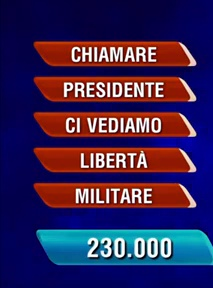

In [ ]:
import easyocr

# Create an OCR reader object
reader = easyocr.Reader(['it'])

# Read text from an image
result = reader.readtext('/content/drive/MyDrive/ghigliottinAI/frames/01-03-2022.jpg')

# Print the extracted text
for detection in result:
    print(detection[1])

#stampa l'immagine
cv2.imread('/content/drive/MyDrive/ghigliottinAI/frames/01-03-2022.jpg')

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/ghigliottinAI/dataset.csv")

for index, frame in tqdm(dataset.iterrows(), total=dataset.shape[0]):
  result = reader.readtext('/content/drive/MyDrive/ghigliottinAI/frames/' + frame.get('frame_namefile'))
  # Store extracted words as a list
  words = [detection[1] for detection in result]

  # Assign the list of words to the 'words' column
  dataset.loc[index, 'words'] = ','.join(words)


  0%|          | 0/454 [00:00<?, ?it/s]

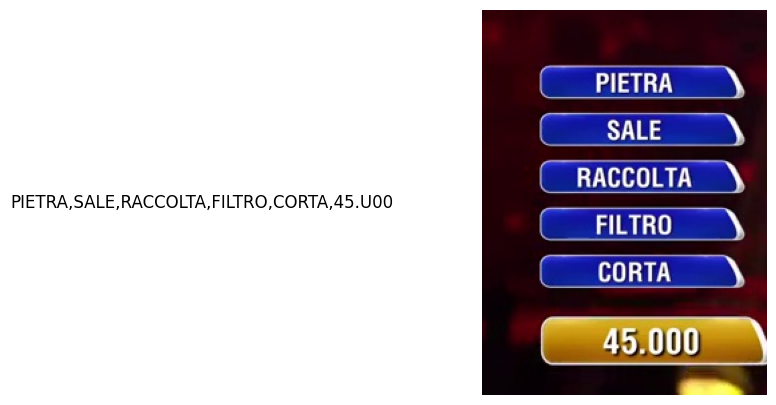

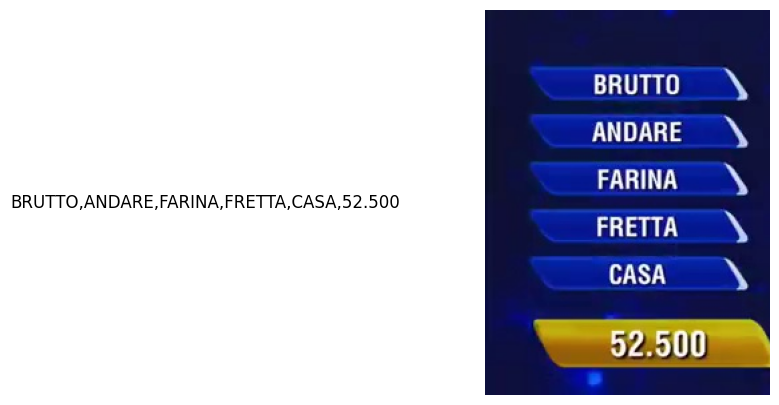

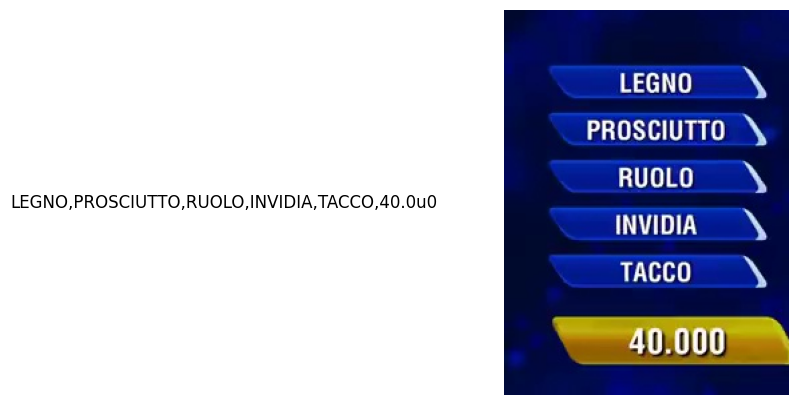

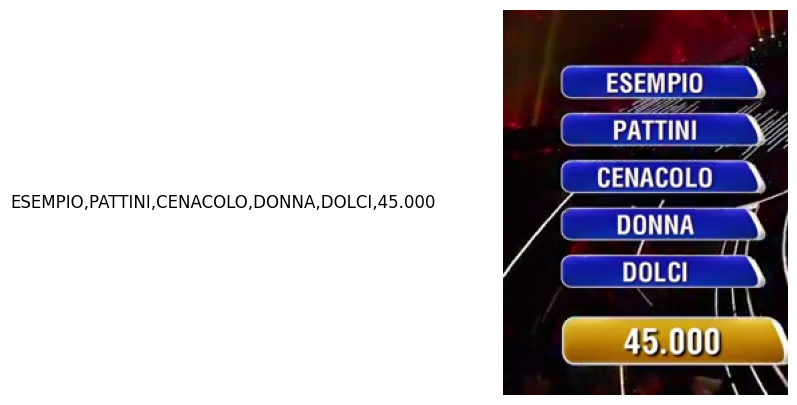

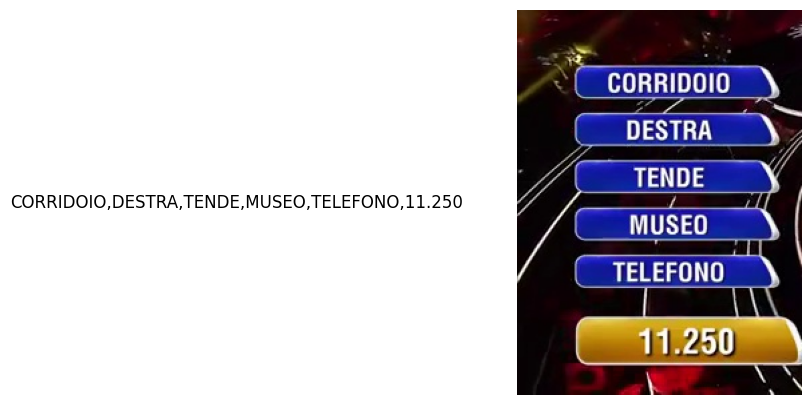

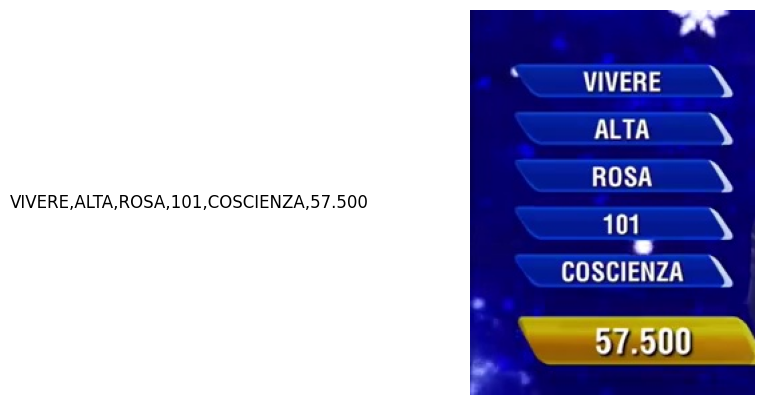

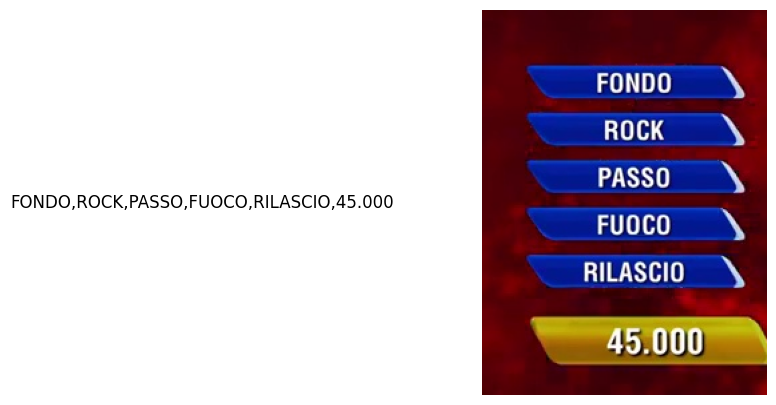

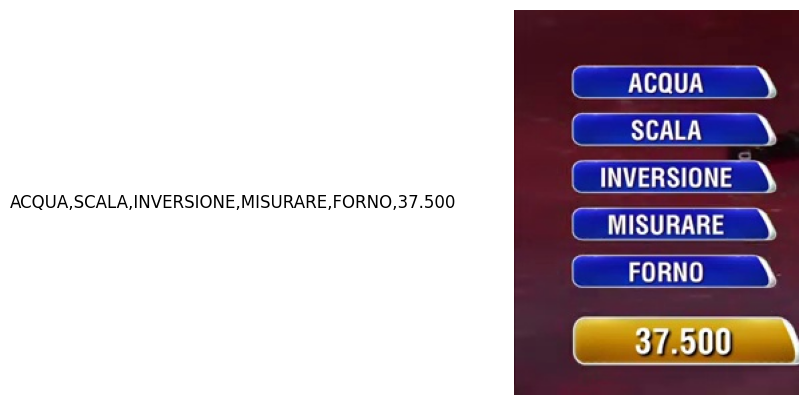

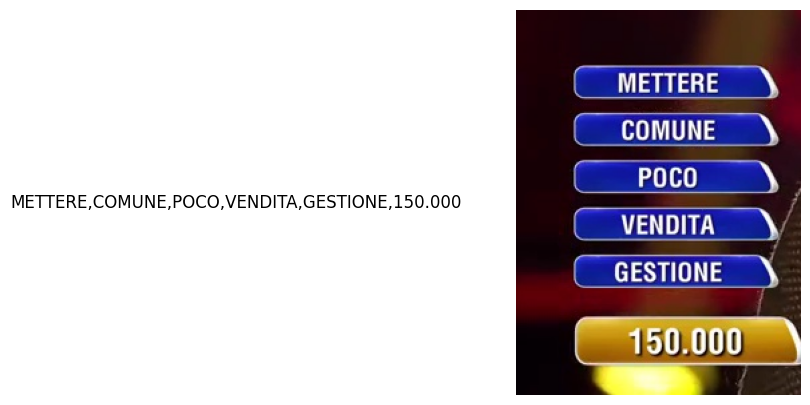

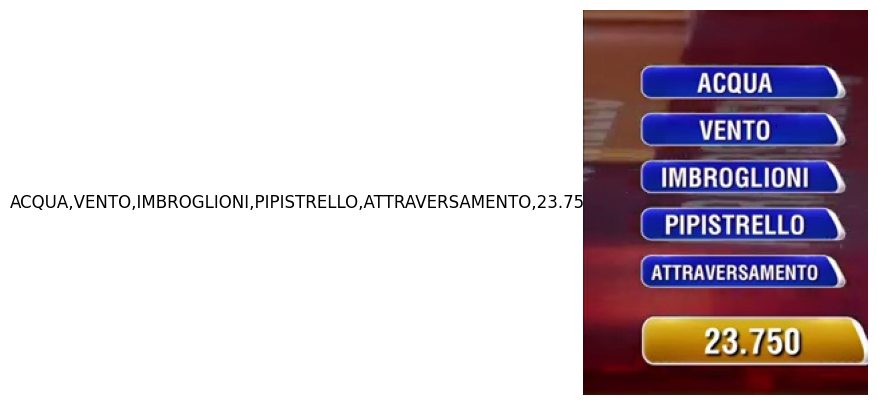

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#estraiamo 10 esempi a caso dal dataset
index = np.random.randint(0, len(dataset), 10)
for i in index:
  testo = dataset.loc[i].get('words')
  img = dataset.loc[i].get('frame_namefile')
  # Definisci il percorso dell'immagine
  immagine_path = f"/content/drive/MyDrive/ghigliottinAI/frames/{img}"

  # Carica l'immagine
  immagine = mpimg.imread(immagine_path)

  # Crea una figura e un subplot
  fig, ax = plt.subplots(1, 2, figsize=(10, 5))

  # Visualizza il testo nel primo subplot
  ax[0].text(0.5, 0.5, testo, ha="center", va="center", fontsize=12)
  ax[0].axis("off")  # Nascondi gli assi

  # Visualizza l'immagine nel secondo subplot
  ax[1].imshow(immagine)
  ax[1].axis("off")  # Nascondi gli assi

  # Mostra la figura
  plt.show()

In [ ]:
dataset

title uploader episode_day  \
0        'La Ghigliottina - L'Eredità 19/11/2024'      Rai  19/11/2024   
1        'La Ghigliottina - L'Eredità 18/11/2024'      Rai  18/11/2024   
2        'La Ghigliottina - L'Eredità 17/11/2024'      Rai  17/11/2024   
3        'La Ghigliottina - L'Eredità 16/11/2024'      Rai  16/11/2024   
4        'La Ghigliottina - L'Eredità 15/11/2024'      Rai  15/11/2024   
..                                            ...      ...         ...   
449  'La ghigliottina - L'Eredità del 16/04/2019'      Rai  16/04/2019   
450  'La ghigliottina - L'Eredità del 15/04/2019'      Rai  15/04/2019   
451  'La ghigliottina - L'Eredità del 11/04/2019'      Rai  11/04/2019   
452  'La ghigliottina - L'Eredità del 10/04/2019'      Rai  10/04/2019   
453  'La ghigliottina - L'Eredità del 27/03/2019'      Rai  27/03/2019   

                                             url  frame_namefile  \
0    https://www.youtube.com/watch?v=Yq5jddSisew  19-11-2024.jpg   
1    https://www.youtube.com/watch?v=ktmE00afoCM  18-11-2024.jpg   
2    https://www.youtube.com/watch?v=kBxDD0Ay3cg  17-11-2024.jpg   
3    https://www.youtube.com/watch?v=NhXTlWDAXI8  16-11-2024.jpg   
4    https://www.youtube.com/watch?v=0s-U6TXMkVA  15-11-2024.jpg   
..                                           ...             ...   
449  https://www.youtube.com/watch?v=gas3BKx51fs  16-04-2019.jpg   
450  https://www.youtube.com/watch?v=YmtK81T44bA  15-04-2019.jpg   
451  https://www.youtube.com/watch?v=29Gd4KGEm6w  11-04-2019.jpg   
452  https://www.youtube.com/watch?v=HlzMy54Bndc  10-04-2019.jpg   
453  https://www.youtube.com/watch?v=QsQT1RNd0VQ  27-03-2019.jpg   

                                                words  
0           GIORNO,PASSARE,LIBRO,GIOCHI,REALTA,23.125  
1      METTERE,PONTEGGIO,ROMANA,ORO,FARMACISTA,47.500  
2             APERTO,MINUTo,COMUNE,TORO,LAVORO,37.500  
3           PIEDE,SGUARDO,DIRETTO,APRIRE,TIRO,160.000  
4          GRUPPO,CARTA,COPPIA,PIU GRANDE,IDEA,45.000  
..                                                ...  
449       SERIE A,RICEVERE,ATTESA,FILM,SOCIALE,50.000  
450  FARE,DESTINO,MOVIMENTO,INNOCENTE,TELEFONO,90.000  
451   SEMPLICE,GUARDIA,MEZZO,CAPPELLO,VECCHIO,100.0uo  
452       PIANO,FASCIA,AIUTO,CHAMPAGNE,SEGRETO,55.000  
453           BRUTTO,ANDARE,FARINA,FRETTA,CASA,52.500  

[454 rows x 6 columns]

In [ ]:
dataset.to_csv("/content/drive/MyDrive/ghigliottinAI/datasetOCR.csv", index=False)

I sottotitoli estratti con yt-dlp non mi piacciono, proviamo con quest'altra libreria

In [ ]:
!pip3 install youtube-transcript-api

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/ghigliottinAI/datasetOCR.csv")

In [ ]:
dataset

title uploader episode_day  \
0        La Ghigliottina - L'EreditÃ  19/11/2024'      Rai  19/11/2024   
1        La Ghigliottina - L'EreditÃ  18/11/2024'      Rai  18/11/2024   
2        La Ghigliottina - L'EreditÃ  17/11/2024'      Rai  17/11/2024   
3        La Ghigliottina - L'EreditÃ  16/11/2024'      Rai  16/11/2024   
4        La Ghigliottina - L'EreditÃ  15/11/2024'      Rai  15/11/2024   
..                                            ...      ...         ...   
449  La ghigliottina - L'EreditÃ  del 16/04/2019'      Rai  16/04/2019   
450  La ghigliottina - L'EreditÃ  del 15/04/2019'      Rai  15/04/2019   
451  La ghigliottina - L'EreditÃ  del 11/04/2019'      Rai  11/04/2019   
452  La ghigliottina - L'EreditÃ  del 10/04/2019'      Rai  10/04/2019   
453  La ghigliottina - L'EreditÃ  del 27/03/2019'      Rai  27/03/2019   

                                             url  frame_namefile  \
0    https://www.youtube.com/watch?v=Yq5jddSisew  19-11-2024.jpg   
1    https://www.youtube.com/watch?v=ktmE00afoCM  18-11-2024.jpg   
2    https://www.youtube.com/watch?v=kBxDD0Ay3cg  17-11-2024.jpg   
3    https://www.youtube.com/watch?v=NhXTlWDAXI8  16-11-2024.jpg   
4    https://www.youtube.com/watch?v=0s-U6TXMkVA  15-11-2024.jpg   
..                                           ...             ...   
449  https://www.youtube.com/watch?v=gas3BKx51fs  16-04-2019.jpg   
450  https://www.youtube.com/watch?v=YmtK81T44bA  15-04-2019.jpg   
451  https://www.youtube.com/watch?v=29Gd4KGEm6w  11-04-2019.jpg   
452  https://www.youtube.com/watch?v=HlzMy54Bndc  10-04-2019.jpg   
453  https://www.youtube.com/watch?v=QsQT1RNd0VQ  27-03-2019.jpg   

                                                words  
0           GIORNO,PASSARE,LIBRO,GIOCHI,REALTA,23.125  
1      METTERE,PONTEGGIO,ROMANA,ORO,FARMACISTA,47.500  
2             APERTO,MINUTo,COMUNE,TORO,LAVORO,37.500  
3           PIEDE,SGUARDO,DIRETTO,APRIRE,TIRO,160.000  
4          GRUPPO,CARTA,COPPIA,PIU GRANDE,IDEA,45.000  
..                                                ...  
449       SERIE A,RICEVERE,ATTESA,FILM,SOCIALE,50.000  
450  FARE,DESTINO,MOVIMENTO,INNOCENTE,TELEFONO,90.000  
451   SEMPLICE,GUARDIA,MEZZO,CAPPELLO,VECCHIO,100.0uo  
452       PIANO,FASCIA,AIUTO,CHAMPAGNE,SEGRETO,55.000  
453           BRUTTO,ANDARE,FARINA,FRETTA,CASA,52.500  

[454 rows x 6 columns]

In [ ]:
from youtube_transcript_api import YouTubeTranscriptApi
 #https://www.youtube.com/watch?v=zklGS4JBr-Y
# assigning srt variable with the list
# of dictionaries obtained by the get_transcript() function
for index, episode in tqdm(dataset.iterrows(), total=dataset.shape[0]):
  episode_day = episode.get('episode_day').replace('/','-')
  video_id = episode.get('url').split('=')[1]
  try:
    srt = YouTubeTranscriptApi.get_transcript(video_id, languages=['it'])
    with open(f'subtitlesNew/{episode_day}.txt', 'w') as f:
      for i in range (len(srt)):
        f.write(srt[i]['text'] + '\n')
  except:
    print(f"errore con l'episodio {episode_day}")

  0%|          | 0/454 [00:00<?, ?it/s]

In [ ]:
!cp subtitlesNew/* /content/drive/MyDrive/ghigliottinAI/subtitlesNew/